In [58]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [3]:
f = np.load('ElecLifetimeFit_Module0.npz')
list(f.keys())

['electron_lifetime_central_value',
 'electron_lifetime_lower_bound',
 'electron_lifetime_upper_bound']

In [33]:
# get lifetimes from file
times = []
elifetimes_central_value = []
for time, elifetime in f['electron_lifetime_central_value']:
    times.append(time)
    elifetimes_central_value.append(elifetime)
    
elifetimes_errorbar = np.zeros((2, len(elifetimes_central_value)))
for i, upper_bound in enumerate(f['electron_lifetime_upper_bound']):
    elifetimes_errorbar[1, i] = upper_bound[1] - elifetimes_central_value[i]
    
for i, lower_bound in enumerate(f['electron_lifetime_lower_bound']):
    elifetimes_errorbar[0, i] = elifetimes_central_value[i] - lower_bound[1]

In [62]:
data_filepath = '/sdf/group/neutrino/sfogarty/ND_prototype_files/charge_data/module-0/radiologicals_study/reco/datalog_2021_04_04_20_59_11_CEST_clusters.h5'
data_file = h5py.File(data_filepath, 'r')
clusters = data_file['clusters']
unique_unix = np.unique(clusters['unix'])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
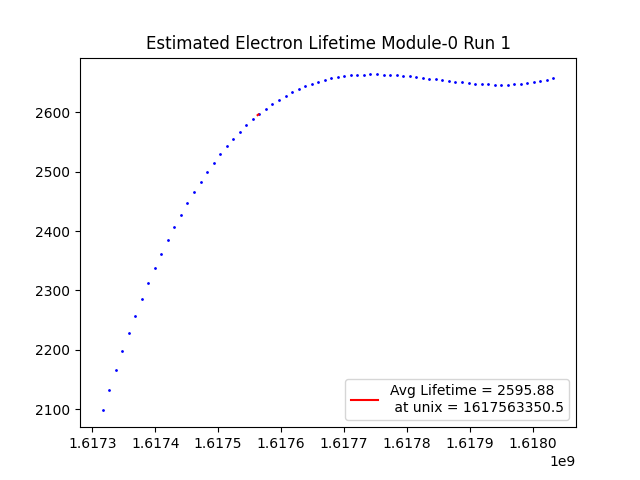

In [77]:
%matplotlib widget
plt.plot(times[::5], elifetimes_central_value[::5], 'bo', markersize=1)
elifetimes_interp = np.interp(unique_unix, times, elifetimes_central_value)
plt.plot(unique_unix, elifetimes_interp, 'r-', label = f'Avg Lifetime = {np.mean(elifetimes_interp):.2f} \n at unix = {np.mean(unique_unix)}')
plt.title('Estimated Electron Lifetime Module-0 Run 1')
plt.legend()
#plt.errorbar(times, elifetimes_central_value, yerr=elifetimes_errorbar,color='k',fmt='o',markersize = 0.1)

In [53]:
import ROOT
file = ROOT.TFile.Open('ElecLifetimeFit_Module0.root', 'READ')
# Print the names of the TGraphs
print("TGraph names in the file:")
for key in file.GetListOfKeys():
    obj = key.ReadObj()
    if isinstance(obj, ROOT.TGraph):
        print(f"TGraph Name: {obj.GetName()}")


# Access a specific TGraph by name
tgraph_name = "electron_lifetime"  # Replace with the name of the TGraph you want to access
tgraph = file.Get(tgraph_name)

# Get the number of points in the TGraph
num_points = tgraph.GetN()

# Access the x and y values of the TGraph
x_values = tgraph.GetX()
y_values = tgraph.GetY()

# Loop over the points and retrieve the values
for i in range(num_points):
    x = x_values[i]
    y = y_values[i]
    print(f"Point {i}: x = {x}, y = {y}")

# Close the ROOT file
file.Close()


TGraph names in the file:
TGraph Name: Graph
TGraph Name: Graph
TGraph Name: Graph


AttributeError: 'TObject' object has no attribute 'GetN'